 # Analyse exploratoire des données du Titanic
Ce notebook présente une **analyse exploratoire du jeu de données Titanic** (source : Kaggle).  
L’objectif consiste à **identifier les caractéristiques des passagers ayant survécu** au naufrage, en les comparant à ceux n’ayant pas survécu.  
L’analyse repose uniquement sur des statistiques descriptives et des visualisations graphiques.

# Plan d'analyse
1) Objectif de l'étude : Cette étude vise à identifier les caractéristiques des passagers ayant survécu au naufrage en les comparant à ceux n’ayant pas survécu en se basant uniquement sur des analyses descriptives

2) Collecte des données via le site kaggle : déjà fait

3) Qualité des données et traitement
* Importation du jeu de donnée Titanic
* Aperçu rapide des données 
* Vérification des valeurs manquantes 
* Vérification des doublons
* Encodage si necessaire  
* Détection des valeurs aberrantes 
* Traitement si necessaire 


a) Importation du jeu de donnée Titanic

In [59]:
# Installation du bibliothèque pour importer un fichier format xls
! pip install xlrd

In [60]:
import pandas as pd

# chargement du dataset

fichier = "D:/Hadidja/DataScience/Donnees/titanic3.xls"

# Charger le fichier Excel (format .xls)
xls = pd.ExcelFile(fichier, engine='xlrd')

# Afficher les feuilles
print(xls.sheet_names)

# Charger une feuille spécifique (par nom ou index)
titanic = pd.read_excel(fichier, sheet_name='Feuil1', engine='xlrd')  # première feuille

['titanic3', 'Feuil1']


b) Aperçu rapide des données

In [61]:
# aperçu des premier ligne
print(titanic.head())
# information sur les colonnes 
print(titanic.info())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [62]:
# Dimension du jeu de données 
titanic.shape

(1309, 14)

In [63]:
# statistique descriptive pour variable numérique 
titanic.select_dtypes(include = 'number').describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


c) Vérification des valeurs manquantes

In [ ]:
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [65]:
titanic.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

d) Vérification des doublons

In [66]:
titanic.duplicated().sum() # nombre de ligne dupliqué 

0

e) Labelisation des modalités des variables

In [67]:
# Remplacer les codes par des linellées clairs 
titanic['embarked'] = titanic['embarked'].replace({
    'C' : "Cherbourg",  
    'Q' : "Queenstown" ,
    'S' : "Southampton"
})

# Transformer en variabes catégorielles ordonnées
titanic['embarked'] = pd.Categorical(
    titanic['embarked'],
    categories = ['Cherbourg', 'Queenstown', 'Southampton']
)

titanic['sex'] = pd.Categorical(
    titanic['sex'],
    categories = ['male', 'female']
)


titanic['pclass'] = titanic['pclass'].replace({
    1: '1er classe',
    2: '2ème classe',
    3: '3ème classe'
})

titanic['pclass'] = pd.Categorical(
    titanic['pclass'],
    categories=['1er classe', '2ème classe', '3ème classe'],
    ordered=True
)


# créer une version lisible de "survied"
titanic['survived'] = titanic['survived'].replace({0: 'No', 1: 'Yes'})
titanic['survived'] = pd.Categorical(titanic['survived'], categories=['No', 'Yes'])


# Dictionnaire des labels

- 'pclass': "Classe de billet",
- 'survived': "Statut de survie (0 = non, 1 = oui)",
- 'name': "Nom du passager",
- 'sex': "Genre du passager",
- 'age': "Âge du passager",
- 'sibsp': "Nombre de frères/sœurs ou conjoints à bord",
- 'parch': "Nombre de parents/enfants à bord",
- 'ticket': "Numéro du billet",
- 'fare': "Tarif payé pour le billet",
- 'cabin': "Numéro de cabine",
- 'embarked': "Port d'embarquement"


f) Détection des valeurs aberrantes

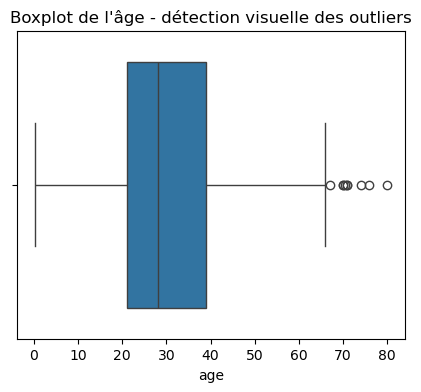

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.boxplot(data=titanic, x='age')
plt.title("Boxplot de l'âge - détection visuelle des outliers")
plt.show() 

* Ce graphique en boîte (boxplot) représente la distribution des âges des passagers du Titanic.  
Le navire accueillait des individus de tous âges, allant de nourrissons de moins d’un an à des personnes très âgées.  
La majorité des passagers étaient des jeunes adultes, principalement âgés de 20 à 40 ans.  
La médiane se situe autour de 30 ans, ce qui indique que 50 % des passagers avaient moins de 30 ans et 50 % plus.

* Le graphique met également en évidence la présence de valeurs extrêmes.  
Ces dernières sont représentées par des points situés au-delà des moustaches, traduisant des âges très 
éloignés de la distribution principale.



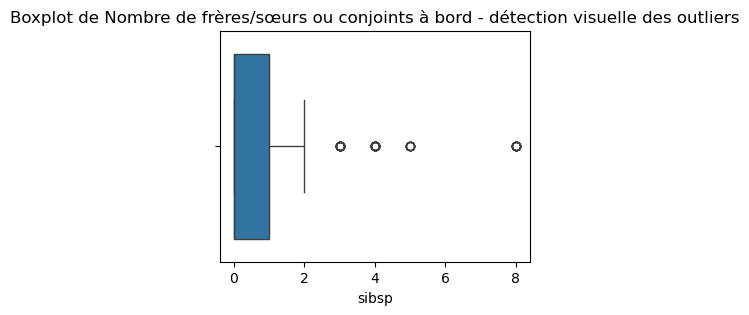

In [69]:
plt.figure(figsize=(4,3))
sns.boxplot(data=titanic, x='sibsp')
plt.title("Boxplot de Nombre de frères/sœurs ou conjoints à bord - détection visuelle des outliers")
plt.show() 

* Cette figure illustre la distribution du nombre de frères, sœurs ou conjoints (variable *SibSp*) à bord du Titanic.  
La majorité des passagers voyageait seule ou avec un maximum de deux proches.  
La médiane, égale à 0, indique qu’au moins la moitié des passagers n’étaient accompagnés d’aucun membre de la famille.

* Une minorité de passagers voyageait avec un nombre élevé de compagnons, allant jusqu’à 8.  
Ces cas représentent des valeurs extrêmes, qui s’éloignent nettement de la distribution centrale.


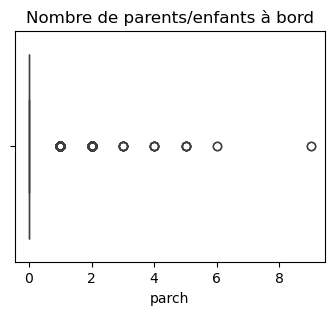

In [70]:
plt.figure(figsize=(4,3))
sns.boxplot(data=titanic, x='parch')
plt.title("Nombre de parents/enfants à bord")
plt.show() 

Ce graphique donne une repartition du nombres de parents et d'enfants présents à bord du titanic.
La majorité des passagers n'était accompagné ni d'aucun parent ni enfant, comme l'indique la
mediane égale à 0.
Seule une minorité voyageait avec des proches avec un nombre pouvant aller jusqu'à 8. 
Ces valeurs elevées, rares et éloignées de la moyenne sont considérées comme des valeurs extrêmes. 

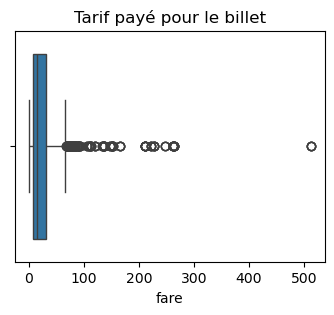

In [71]:
plt.figure(figsize=(4,3))
sns.boxplot(data=titanic, x='fare')
plt.title("Tarif payé pour le billet")
plt.show() 

Ce graphique représente la repartition des tarifs payés par les passagers du titanic.
La majorité d'entre eux a déboursé un montant relativement faible compris entre 0 et 30$, 
avec quelques cas jusqu'à allant jusqu'à 70$. la médiane situé autour de 22$, confirme cette concentration
sur les tarifs les plus bas. 
Une minorité des passagers a cependant payé des montant beaucoup plus elevés, atteignant jusqu'à 500$. 
Ces valeurs elevées, rares et très éloignées de la tendace centrale cont considéreés comme des 
valeurs extrêmes.

h) Traitement des données

In [72]:
# Traitement des valeurs manquantes
import pandas as pd  

cols_interet = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp',   
                'parch', 'ticket', 'fare', 'embarked']  

# Sélectionner les colonnes du DataFrame 'titanic'  
titanic_dt = titanic[cols_interet]  

# Afficher les premières lignes du nouveau DataFrame  
print(titanic_dt.head())  

       pclass survived                                             name  \
0  1er classe      Yes                    Allen, Miss. Elisabeth Walton   
1  1er classe      Yes                   Allison, Master. Hudson Trevor   
2  1er classe       No                     Allison, Miss. Helen Loraine   
3  1er classe       No             Allison, Mr. Hudson Joshua Creighton   
4  1er classe       No  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   

      sex      age  sibsp  parch  ticket      fare     embarked  
0  female  29.0000      0      0   24160  211.3375  Southampton  
1    male   0.9167      1      2  113781  151.5500  Southampton  
2  female   2.0000      1      2  113781  151.5500  Southampton  
3    male  30.0000      1      2  113781  151.5500  Southampton  
4  female  25.0000      1      2  113781  151.5500  Southampton  


In [73]:
# copier les données originale et remplacer des valeurs par NaN

import numpy as np
import pandas as pd 

# 2. Faire une copie sur laquelle nous allons travaillé
data = titanic_dt.copy()

# 3. Créer le masque où l'on veut volontairement mettre NaN
mask_random = (data['age'] > 23) & (data['age'] <= 30)

 # 4. Sauvegarder les vraies valeurs AVANT de mettre des NaN
true_age = data.loc[mask_random, 'age'].copy()

# 5. Maintenant remplacer par NaN
data.loc[mask_random, 'age'] = np.nan


 

In [74]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error

# 1. Copier la base originale
data = titanic_dt.copy()

# 2. Créer un masque sur les âges entre 20 et 24 ans
mask_random = (data['age'] > 23) & (data['age'] <= 30)

# 3. Sauvegarder les vraies valeurs d'age
true_age = data.loc[mask_random, 'age'].copy()

# 4. Remplacer par NaN
data.loc[mask_random, 'age'] = np.nan

# 5. Tester plusieurs k
errors = {}

for k in range(5, 11):
    imputer = KNNImputer(n_neighbors=k)
    imputed_array = imputer.fit_transform(data.select_dtypes(include=[np.number]))

    # Transformer en DataFrame pour accéder facilement aux colonnes
    imputed = pd.DataFrame(imputed_array, columns=data.select_dtypes(include=[np.number]).columns)

    # 6. Prendre les valeurs imputées aux endroits où c'était NaN
    predicted_age = imputed.loc[mask_random, 'age']

    # 7. Calculer l'erreur
    error = mean_absolute_error(true_age, predicted_age)
    errors[k] = error

print("Erreurs MAE pour chaque k:", errors)

# 8. Trouver k optimal
k_optimal = min(errors, key=errors.get)
print(f"K optimal : {k_optimal}")



Erreurs MAE pour chaque k: {5: 9.970615742971887, 6: 9.396084337349398, 7: 9.514486517498565, 8: 9.088729919678714, 9: 8.70188161535029, 10: 8.600535502008032}
K optimal : 10


In [75]:
 # Réimputation avec le k optimal
imputer_final = KNNImputer(n_neighbors=k_optimal)
titanic_dt_num = titanic_dt.select_dtypes(include=[np.number])
titanic_dt_imputed = imputer_final.fit_transform(titanic_dt_num)

# Mettre à jour les colonnes numériques imputées dans titanic_dt
titanic_dt[titanic_dt_num.columns] = titanic_dt_imputed


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3922357661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt[titanic_dt_num.columns] = titanic_dt_imputed


In [76]:
 # Imputation de 'fare' par la médiane
titanic_dt['fare'] = titanic_dt['fare'].fillna(titanic_dt['fare'].median())

# Imputation de 'embarked' par "Southampton"
titanic_dt['embarked'] = titanic_dt['embarked'].fillna("Southampton")


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3815588264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt['fare'] = titanic_dt['fare'].fillna(titanic_dt['fare'].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3815588264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt['embarked'] = titanic_dt['embarked'].fillna("Southampton")


 4. Analyse de données:
    
    a) Analyse univarié
    b) Analyse bivarié
    c) Analyse multivarié

a) Analyse univarié

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1. Table de fréquences
print(titanic_dt['survived'].value_counts())

survived
No     809
Yes    500
Name: count, dtype: int64


In [78]:
# 2.2. Proportions
print(titanic_dt['survived'].value_counts(normalize=True))

survived
No     0.618029
Yes    0.381971
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\904898229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic_dt, palette='Blues')


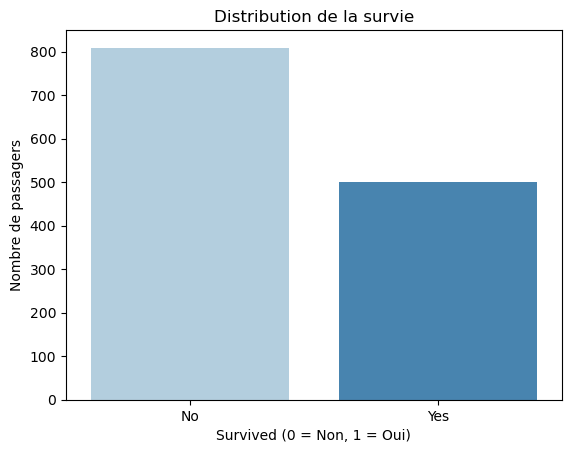

<Figure size 640x480 with 0 Axes>

In [79]:
# 2.3. Graphique (barplot)
sns.countplot(x='survived', data=titanic_dt, palette='Blues')
plt.title('Distribution de la survie')
plt.xlabel('Survived (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de passagers')
plt.show()
plt.savefig("graphique.png", dpi=300, bbox_inches='tight')


Ce graphique illustre la repartition des passagers selon leur statut de survie. Le nombre de survivants est relativement faible, avec un effectif d’environ 500 passagers. En comparaison, le nombre de passagers décédés est nettement supérieur, avoisinant les 800.

In [80]:
# 1. Table de fréquences
print(titanic_dt['sex'].value_counts())


sex
male      843
female    466
Name: count, dtype: int64


In [81]:
# 2. Proportions
print(titanic_dt['sex'].value_counts(normalize=True))

sex
male      0.644003
female    0.355997
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3244629967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic_dt, palette='Greens')


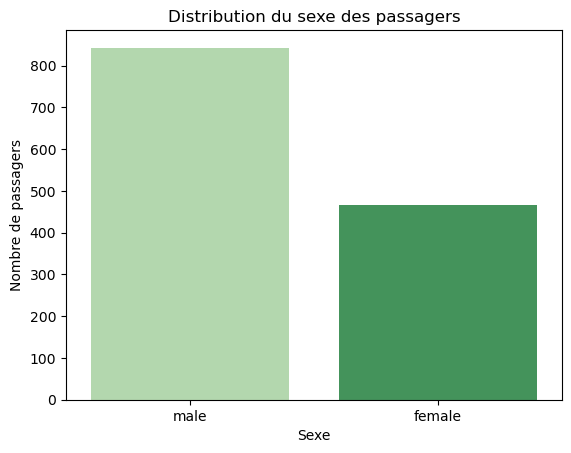

In [82]:
# 3. Graphique
sns.countplot(x='sex', data=titanic_dt, palette='Greens')
plt.title('Distribution du sexe des passagers')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

Ce graphique présente la répartition des passagers selon leur genre à bord du Titanic. La majorité des passagers étaient des hommes, avec un effectif d’environ 800. Le nombre de femme était autour de 400. Cela montre que les hommes représentaient une part nettement plus importante des passagers.

In [83]:
# Table de fréquences
print(titanic_dt['pclass'].value_counts())

pclass
3ème classe    709
1er classe     323
2ème classe    277
Name: count, dtype: int64


In [84]:
# Proportions
print(titanic_dt['pclass'].value_counts(normalize=True))

pclass
3ème classe    0.541635
1er classe     0.246753
2ème classe    0.211612
Name: proportion, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\588453829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=titanic_dt, palette='deep')


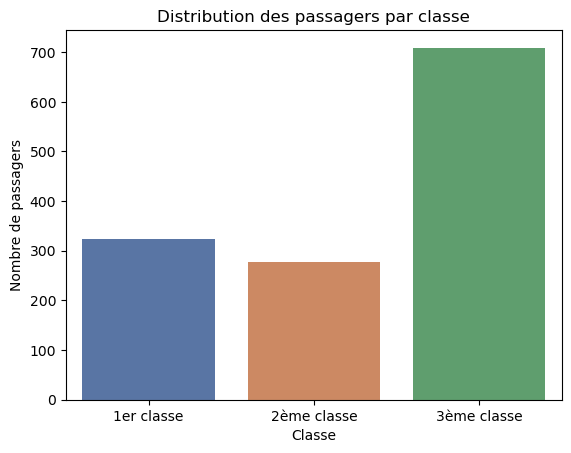

In [85]:
# Graphique
sns.countplot(x='pclass', data=titanic_dt, palette='deep')
plt.title('Distribution des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

Ce graphique présente la répartition des passagers selon leur classe à bord du Titanic.  
La troisième classe regroupe la majorité des passagers, avec un total de 709 individus.  
La première classe en compte 323 et la deuxième, 277.  
Cette répartition montre une concentration marquée en troisième classe, qui représente plus de la moitié des passagers, tandis que les classes supérieures étaient beaucoup moins représentées.


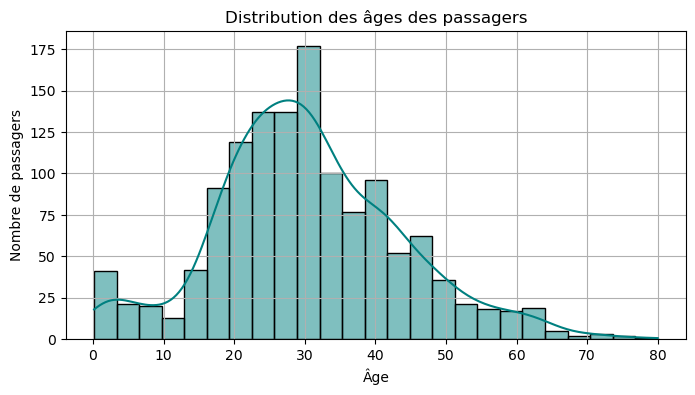

In [86]:
# Histogramme pour l'âge des passager
plt.figure(figsize=(8,4))
sns.histplot(titanic_dt['age'], bins=25, kde=True, color='teal')
plt.title('Distribution des âges des passagers')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.grid(True) # courbe de densité
plt.show()


le graphique illustre la répartition des âges des passagers. La majorité des passagers sont de jeunes adultes âgés de 20 à 40 ans. Quelques enfants de moins de 10 ans ainsi que des passagers âgés de plus de 60 ans sont également présents à bord.La médiane, située autour de 28 ans, confirme la concentration des âges autour des jeunes adultes. Les âges très bas ou très élevés, bien qu’exceptionnels, s’éloignent nettement de la tendance centrale et peuvent être considérés comme des valeurs extrêmes.

In [87]:
# comment calculer le nombre d'intervalle pour l'histogramme 
# Importer la bibliothèque numpy pour les calculs numériques
import numpy as np

# Récupérer la colonne 'age' du dataset Titanic sans les valeurs manquantes (NaN)
tarif = titanic_dt['age'].dropna()
# Calculer le nombre total d'observations (passagers avec âge renseigné)
n = len(tarif)
# Trouver l'âge minimum
min_tarif = tarif.min()
# Trouver l'âge maximum
max_tarif = tarif.max()
# Calculer l'écart-type des âges (mesure de la dispersion autour de la moyenne)
std_tarif = tarif.std()
# Calculer l'écart interquartile (IQR = Q3 - Q1) pour mesurer la dispersion médiane
iqr_tarif = tarif.quantile(0.75) - tarif.quantile(0.25)
# ====================
# Calcul du nombre d'intervalles avec trois méthodes différentes :
# ====================
# 1. Méthode de Sturges (classique pour les histogrammes)
k_sturges = int(1 + np.log2(n))  # 1 + log2(n)

# 2. Méthode de Scott (basée sur l'écart-type et la taille de l'échantillon)
h_scott = 3.5 * std_tarif / (n ** (1/3))  # Calcul de la largeur de bande selon Scott
k_scott = int((max_tarif - min_tarif) / h_scott)  # Nombre d'intervalles = étendue totale divisée par la largeur

# 3. Méthode de Freedman-Diaconis (plus robuste car basée sur l'IQR)
h_fd = 2 * iqr_tarif / (n ** (1/3))  # Largeur de bande selon Freedman-Diaconis
k_fd = int((max_tarif - min_tarif) / h_fd)  # Nombre d'intervalles = étendue totale divisée par la largeur

# ====================
# Afficher les résultats pour comparer
# ====================

print(f"Nombre d'intervalles selon Sturges : {k_sturges}")
print(f"Nombre d'intervalles selon Scott : {k_scott}")
print(f"Nombre d'intervalles selon Freedman-Diaconis : {k_fd}")


Nombre d'intervalles selon Sturges : 11
Nombre d'intervalles selon Scott : 18
Nombre d'intervalles selon Freedman-Diaconis : 25


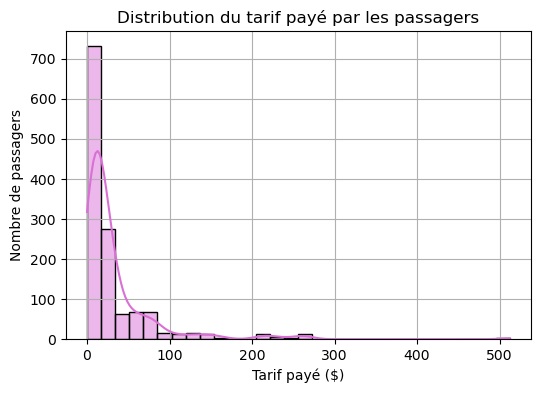

In [88]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une figure avec une taille définie
plt.figure(figsize=(6,4))

# Tracer l'histogramme du tarif payé (fare) avec 30 intervalles (bins)
# kde=True pour ajouter la courbe de densité
# color='orchid' pour choisir une couleur violette claire
sns.histplot(titanic_dt['fare'], bins=30, kde=True, color='orchid')
plt.title('Distribution du tarif payé par les passagers') # Ajouter un titre au graphique
plt.xlabel('Tarif payé ($)') # Ajouter un label à l'axe des x
plt.ylabel('Nombre de passagers') # Ajouter un label à l'axe des y
plt.grid(True) # Afficher une grille pour faciliter la lecture
plt.show() # Afficher le graphique


Le graphique présente la repartition des tarifs payés par les passagers à bord du Titanic.
Les tarifs payés allaient de 0 à 500$.  La majorité des passagers ont payé des montants relativement faibles, 
généralement compris entre 0 et 30 dollars. En revanche les tarifs les plus élevés, allant jusqu’à 500 dollars, sont beaucoup plus rares. Cette distribution suggère que la plupart des passagers appartenaient à des classes sociales modestes, tandis qu’une minorité plus aisée a payé des tarifs nettement plus élevés.
 

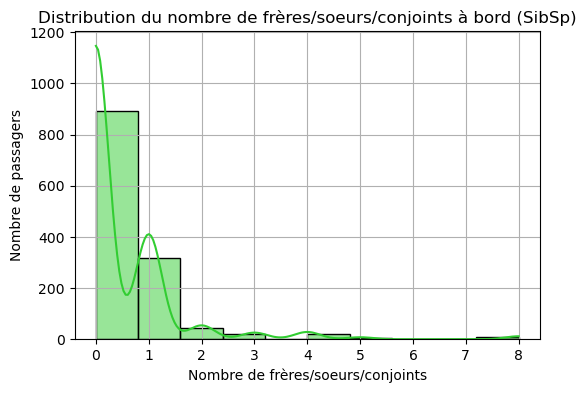

In [89]:
# Histogramme pour la variable 'sibsp'
plt.figure(figsize=(6,4))
sns.histplot(titanic_dt['sibsp'], bins = 10, kde=True, color='limegreen')
plt.title('Distribution du nombre de frères/soeurs/conjoints à bord (SibSp)')
plt.xlabel('Nombre de frères/soeurs/conjoints')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()

 

Ce graphique illustre la répartition du nombre de frères, sœurs et conjoints présents à bord du Titanic. La majorité des passagers voyageaient seuls ou accompagnés d’un seul proche. En revanche, une minorité était entourée de plusieurs membres de leur famille, certains ayant jusqu’à huit compagnons de voyage.

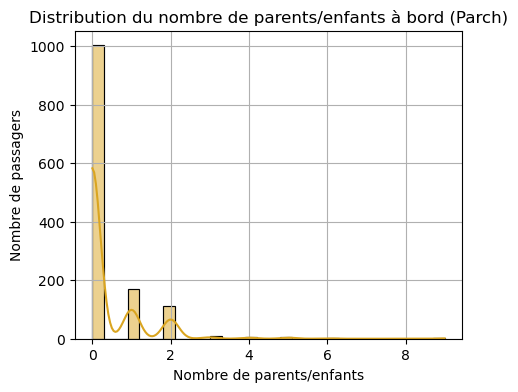

In [90]:
# Histogramme pour la variable 'parch'
plt.figure(figsize=(5,4))
sns.histplot(titanic_dt['parch'], bins= 30, kde=True, color='goldenrod')
plt.title('Distribution du nombre de parents/enfants à bord (Parch)')
plt.xlabel('Nombre de parents/enfants')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()


Ce graphique présente le nombre d’enfants et de parents ayant voyagé avec les passagers à bord du Titanic.
La grande majorité était seule, sans enfant ni parent.
Quelques passagers étaient accompagnés d’un ou deux proches.
Toutefois, une minorité se distinguait par une présence familiale plus marquée, certains étant entourés de jusqu’à huit membres de leur famille.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2068955674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=titanic_dt, palette='Set2')


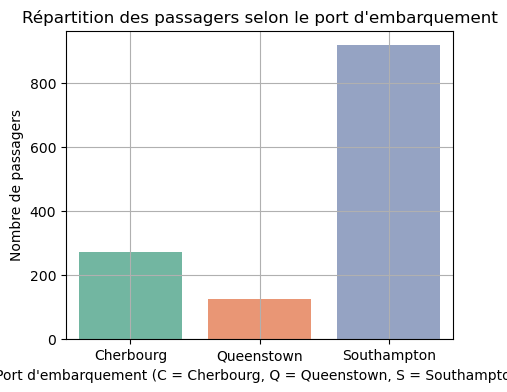

In [91]:
# Graphique en barres pour la variable 'embarked'
plt.figure(figsize=(5,4))
sns.countplot(x='embarked', data=titanic_dt, palette='Set2')
plt.title("Répartition des passagers selon le port d'embarquement")
plt.xlabel('Port d\'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()

Ce graphique met en évidence les différents ports d’embarquement utilisés par les passagers du Titanic.
La grande majorité a embarqué depuis Southampton, ce qui en fait le principal point de départ du navire.
Les deux autres ports, Cherbourg et Queenstown, ont été utilisés par une proportion nettement plus faible de passagers

In [92]:
# Résumé de l'âge
print(titanic_dt['age'].describe())
print('Écart-type :', titanic_dt['age'].std())

# Résumé du tarif payé
print(titanic_dt['fare'].describe())
print('Écart-type :', titanic_dt['fare'].std())

# Résumé du nombre de frères/sœurs/conjoints
print(titanic_dt['sibsp'].describe())
print('Écart-type :', titanic_dt['sibsp'].std())

# Résumé du nombre de parents/enfants
print(titanic_dt['parch'].describe())
print('Écart-type :', titanic_dt['parch'].std())


count    1309.000000
mean       30.473714
std        13.324229
min         0.166700
25%        22.000000
50%        29.600000
75%        39.000000
max        80.000000
Name: age, dtype: float64
Écart-type : 13.324228919515226
count    1309.000000
mean       33.276489
std        51.743441
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64
Écart-type : 51.74344103152351
count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64
Écart-type : 1.0416583905961017
count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: parch, dtype: float64
Écart-type : 0.8655602753495126


b) Analyses bivariées 

Label Encoding
Le Label Encoding est une technique de transformation de variables catégorielles en valeurs numériques ordinales. Chaque catégorie possible de la variable est remplacée par un entier unique, en fonction de l'ordre dans lequel les catégories apparaissent dans la variable.

Avantages
Le Label Encoding présente plusieurs avantages :

Il est simple à mettre en œuvre et ne nécessite pas beaucoup de resso
urces.
Il préserve l'ordre des catégories si elle est importante pour l'a
nalyse.
Inconvénients
Le Label Encoding présente également quelques inconvénients :

Il crée une relation d'ordre artificielle entre les 
catégories.
Il n'est pas adapté à certains algorithmes de machine learning, tels que les réseaux de neurones et les machines à vecteurs de support, qui peuvent interpréter les valeurs numériques comme des valeurs continues plutôt que des
 catégories.
Conditions d'utilisation
Le Label Encoding est adapté aux variables catégorielles qui ont une relation d'ordre naturelle et pour lesquelles l'interprétation en termes de valeurs numériques est pertinente. Cependant, il est important de prendre en compte les avantages, les inconvénients et les conditions d'utilisation de cette technique pour éviter des erreurs d'interprétation ou des problèmes d'analyse.

En général, le Label Encoding est une technique simple et rapide pour encoder des variables catégorielles en valeurs numériques ordinales, mais il est important de bien comprendre ses limites et d'utiliser d'autres techniques d'encodage pour des analyses plus avancées ou pour des algorithmes de machine learning plus complexes.

In [93]:
 # package pour faire l'encodage des variables 
from sklearn.preprocessing import (LabelEncoder, OrdinalEncoder, OneHotEncoder,
                                    LabelBinarizer, MultiLabelBinarizer)

print(titanic_dt[['survived']].head())

  survived
0      Yes
1      Yes
2       No
3       No
4       No


In [94]:
 
# Label encoding
le = LabelEncoder()  
titanic_dt['survecu'] = le.fit_transform(titanic_dt['survived']) # crée une nouvelle colonne 'survived' et encode 'survecu'  
print("Label encoding : ") # afficher un titre  
print(titanic_dt[['survived', 'survecu']].head()) # afficher les premières lignes des deux colonnes  
print("Valeurs Unique")  
print(titanic_dt.survecu.unique()) # afficher les valeurs uniques de la colonne 'survecu'  



Label encoding : 
  survived  survecu
0      Yes        1
1      Yes        1
2       No        0
3       No        0
4       No        0
Valeurs Unique
[1 0]


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\1010364835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt['survecu'] = le.fit_transform(titanic_dt['survived']) # crée une nouvelle colonne 'survived' et encode 'survecu'


In [95]:
titanic_dt.groupby('sex')['survecu'].mean()




C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2279728241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_dt.groupby('sex')['survecu'].mean()


sex
male      0.190985
female    0.727468
Name: survecu, dtype: float64

In [96]:
titanic_dt.groupby('pclass')['survecu'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3717592610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_dt.groupby('pclass')['survecu'].mean()


pclass
1er classe     0.619195
2ème classe    0.429603
3ème classe    0.255289
Name: survecu, dtype: float64

In [97]:
titanic_dt.groupby('embarked')['survecu'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2197543727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_dt.groupby('embarked')['survecu'].mean()


embarked
Cherbourg      0.555556
Queenstown     0.357724
Southampton    0.334061
Name: survecu, dtype: float64

In [98]:
print(titanic_dt['survived'].unique())



['Yes', 'No']
Categories (2, object): ['No', 'Yes']


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\722993447.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_sex = titanic_dt.groupby('sex')['survecu'].mean()


Taux de survie par sexe :
 sex
male      0.190985
female    0.727468
Name: survecu, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\722993447.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survecu', data=titanic_dt, palette='pastel')


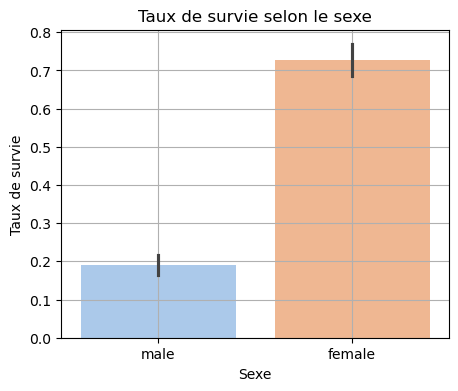

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Taux de survie par sexe
survival_sex = titanic_dt.groupby('sex')['survecu'].mean()
print('Taux de survie par sexe :\n', survival_sex)

# Barplot survie selon le sexe
plt.figure(figsize=(5,4))
sns.barplot(x='sex', y='survecu', data=titanic_dt, palette='pastel')
plt.title('Taux de survie selon le sexe')
plt.ylabel('Taux de survie')
plt.xlabel('Sexe')
plt.grid(True)
plt.show()



Ce graphique illustre une répartition du taux de survie des passagers en fonction du genre. Environ 75% des femmes ont survécu, contre seulement 19% des hommes. Cela suggère qu’au moment du naufrage, les femmes ont été prioritaires lors des opérations de sauvetage.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3446952145.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_class = titanic_dt.groupby('pclass')['survecu'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3446952145.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survecu', data=titanic_dt, palette='muted')


Taux de survie par classe :
 pclass
1er classe     0.619195
2ème classe    0.429603
3ème classe    0.255289
Name: survecu, dtype: float64


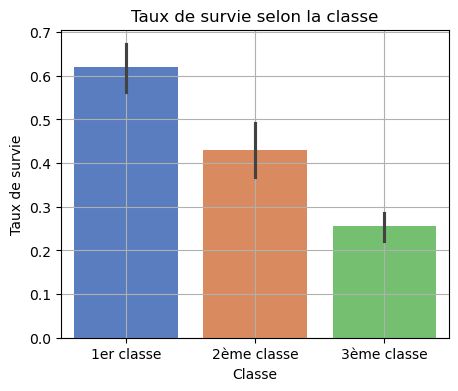

In [100]:
# Taux de survie par classe
survival_class = titanic_dt.groupby('pclass')['survecu'].mean()
print('Taux de survie par classe :\n', survival_class)

# Barplot survie selon la classe
plt.figure(figsize=(5,4))
sns.barplot(x='pclass', y='survecu', data=titanic_dt, palette='muted')
plt.title('Taux de survie selon la classe')
plt.ylabel('Taux de survie')
plt.xlabel('Classe')
plt.grid(True)
plt.show()

Cette figure présente en fonction de la classe de voyage, la répartition du taux de survie des passagers. 60% des passagers de première classe ont survécu, contre 44% en deuxième classe et seulement 27% en troisième classe. Cela montre que, bien que de nombreux passagers se trouvaient en troisième classe, la majorité d’entre eux ont péri. A l’inverse la proportion des survivants de survivants est plus élevée dans les classes supérieures, ce qui peut suggérer que les passagers de haut rang ont été privilégiés.

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2123944791.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_embarked = titanic_dt.groupby('embarked')['survecu'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2123944791.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survecu', data=titanic_dt, palette='cool')


Taux de survie par port d'embarquement :
 embarked
Cherbourg      0.555556
Queenstown     0.357724
Southampton    0.334061
Name: survecu, dtype: float64


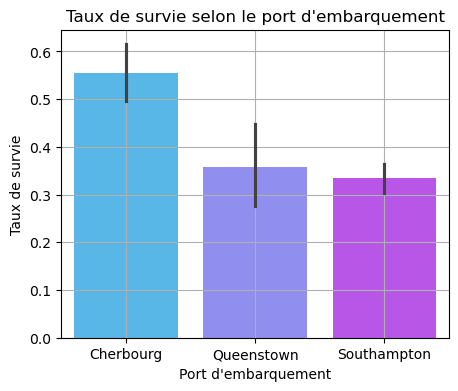

In [101]:
# Taux de survie par port d'embarquement
survival_embarked = titanic_dt.groupby('embarked')['survecu'].mean()
print('Taux de survie par port d\'embarquement :\n', survival_embarked)

# Barplot survie selon le port d'embarquement
plt.figure(figsize=(5,4))
sns.barplot(x='embarked', y='survecu', data=titanic_dt, palette='cool')
plt.title('Taux de survie selon le port d\'embarquement')
plt.ylabel('Taux de survie')
plt.xlabel('Port d\'embarquement')
plt.grid(True)
plt.show()

Ce graphique montre le taux de survie des passagers selon leur port d’embarquement.
Les passagers embarqués à Cherbourg affichent le taux de survie le plus élevé, avec environ 55 % de survivants.
Ceux qui ont embarqué à Queenstown présentent un taux légèrement inférieur, autour de 35 %.
En revanche, Southampton enregistre le taux de survie le plus faible, avec seulement 33 % de passagers ayant survécu.

In [102]:
# Regrouper par port d'embarquement
grouped = titanic_dt.groupby('embarked')

# Calculer le taux de survie (moyenne de la variable binaire 'survecu')
taux_survie = grouped['survecu'].mean().round(2) * 100

# Calculer le nombre de passagers par port
effectifs = grouped['survecu'].count()

# Combiner les deux en un DataFrame
resultat = pd.DataFrame({
    'Taux de survie (%)': taux_survie,
    'Nombre de passagers': effectifs
})

print(resultat)


             Taux de survie (%)  Nombre de passagers
embarked                                            
Cherbourg                  56.0                  270
Queenstown                 36.0                  123
Southampton                33.0                  916


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2988381118.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic_dt.groupby('embarked')


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2979065806.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=titanic_dt, palette='Set2')


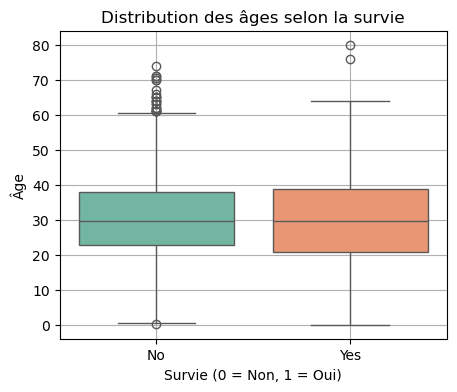

In [103]:
# Boxplot de l'âge selon la survie
plt.figure(figsize=(5,4))
sns.boxplot(x='survived', y='age', data=titanic_dt, palette='Set2')
plt.title('Distribution des âges selon la survie')
plt.xlabel('Survie (0 = Non, 1 = Oui)')
plt.ylabel('Âge')
plt.grid(True)
plt.show()

Ce graphique montre la répartition des passagers selon leur statut de survie et leur âge. Les non survivants étaient majoritairement jeunes, entre 22 et 38ans. Quant aux survivants, bien qu’ils appartiennent à une tranche d’âge similaire (21 à 39ans), il y’a une présence plus marquée des personnes âgées. Cela pourrait indiquer que les personnes âgées ont été d’avantage favorisés lors des secours. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\1437010327.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare', data=titanic_dt, palette='Set3')


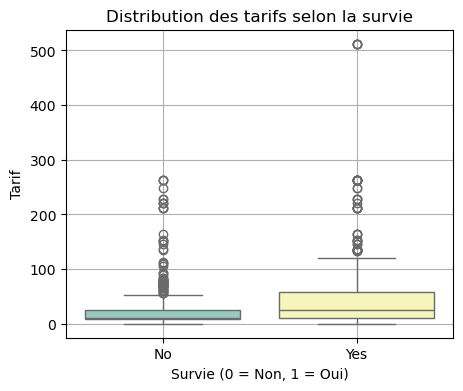

In [104]:
# Boxplot du tarif selon la survie
plt.figure(figsize=(5,4))
sns.boxplot(x='survived', y='fare', data=titanic_dt, palette='Set3')
plt.title('Distribution des tarifs selon la survie')
plt.xlabel('Survie (0 = Non, 1 = Oui)')
plt.ylabel('Tarif')
plt.grid(True)
plt.show()

Le graphique présent illustre la répartition du taux de survie des passagers en fonction des tarifs de billet payés. Les passagers ayant payés des tarifs faibles (0 à 50$) sont majoritairement décédés. Bien que des survivants aient aussi payés des tarifs réduits, il y’a une proportion significative de survivants parmi ceux ayant payé des billets plus chers. Cela renforce l’idée que les passagers plus aisés ont eu plus de chance de survivre. 

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\3773756987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='survived', y='fare', data=titanic_dt, palette='pastel')


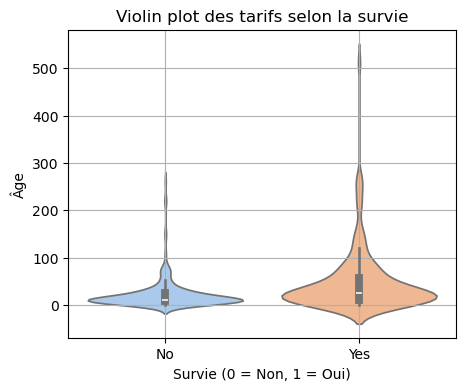

In [105]:
# Violin plot de l'âge (optionnel, pour beauté visuelle)
plt.figure(figsize=(5,4))
sns.violinplot(x='survived', y='fare', data=titanic_dt, palette='pastel')
plt.title('Violin plot des tarifs selon la survie')
plt.xlabel('Survie (0 = Non, 1 = Oui)')
plt.ylabel('Âge')
plt.grid(True)
plt.show()

TEST STATISTIQUE 
Avec ces test il sera plus plosible de verifier les relations entre 
la variable statut de survie et chacune des autres variables. Il sera 
également question de valider les hypothèses ennoncé dans le doc

Test de Chi2

In [106]:
# test de chi2 entre le sexe et la variable survie 
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(titanic_dt['sex'], titanic_dt['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi² = {chi2}, p-value = {p}")

Chi² = 363.6179084388249, p-value = 4.589924936952945e-81


In [107]:
# test de chi2 entre la classe de voyage et la variable survie 
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(titanic_dt['pclass'], titanic_dt['survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi² = {chi2}, p-value = {p}")

Chi² = 127.85915643930326, p-value = 1.7208259588256175e-28


Test de student

In [108]:
# test de t-test entre la variable âge et la variable survie 
from scipy.stats import ttest_ind

age_survived = titanic_dt[titanic_dt['survecu'] == 1]['age'].dropna()
age_not_survived = titanic_dt[titanic_dt['survecu'] == 0]['age'].dropna()
t_stat, p_val = ttest_ind(age_survived, age_not_survived)
print(f"t = {t_stat}, p = {p_val}")

t = -1.523877936151011, p = 0.1277811189703033


In [109]:
# test de t-test entre la variable nombre d'enfant et la variable survie 
from scipy.stats import ttest_ind

age_survived = titanic_dt[titanic_dt['survecu'] == 1]['parch'].dropna()
age_not_survived = titanic_dt[titanic_dt['survecu'] == 0]['parch'].dropna()
t_stat, p_val = ttest_ind(age_survived, age_not_survived)
print(f"t = {t_stat}, p = {p_val}")

t = 2.9986081061446903, p = 0.0027634234277973185


In [110]:
# test de t-test entre la variable nombre de frère/soeur/conjoint et la variable survie 
from scipy.stats import ttest_ind

age_survived = titanic_dt[titanic_dt['survecu'] == 1]['sibsp'].dropna()
age_not_survived = titanic_dt[titanic_dt['survecu'] == 0]['sibsp'].dropna()
t_stat, p_val = ttest_ind(age_survived, age_not_survived)
print(f"t = {t_stat}, p = {p_val}")

t = -1.0063360167353663, p = 0.3144402285458129


In [111]:
# test de t-test entre la variable tarif payé et la variable survie 
from scipy.stats import ttest_ind

age_survived = titanic_dt[titanic_dt['survecu'] == 1]['fare'].dropna()
age_not_survived = titanic_dt[titanic_dt['survecu'] == 0]['fare'].dropna()
t_stat, p_val = ttest_ind(age_survived, age_not_survived)
print(f"t = {t_stat}, p = {p_val}")

t = 9.114954121527704, p = 2.8808225822928943e-19


c) Analyses multivariées : croisement de plusieurs variables

In [112]:
# Taux de survie par sexe et classe
print(titanic_dt.groupby(['sex', 'pclass'])['survecu'].mean())


sex     pclass     
male    1er classe     0.340782
        2ème classe    0.146199
        3ème classe    0.152130
female  1er classe     0.965278
        2ème classe    0.886792
        3ème classe    0.490741
Name: survecu, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\2822089922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_dt.groupby(['sex', 'pclass'])['survecu'].mean())


C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\1876086536.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = titanic_dt.pivot_table('survecu', index='sex', columns='pclass')


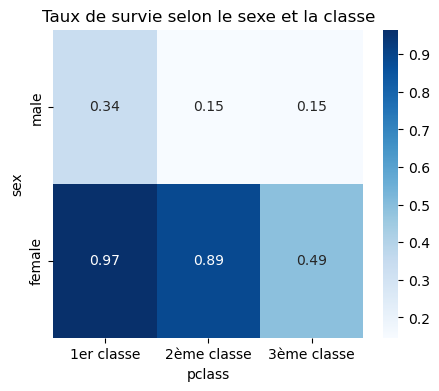

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul du taux de survie par sexe et classe
pivot_table = titanic_dt.pivot_table('survecu', index='sex', columns='pclass')

# Affichage de la heatmap
plt.figure(figsize=(5,4))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Taux de survie selon le sexe et la classe')
plt.show()

Ce graphique, sous forme de carte thermique (heatmap) présente la répartition des passagers selon leur statut de survie, leur sexe et leur classe de voyage.  97% des femmes de première classe ont survécu tout comme 89% des femmes de deuxième classe. En revanche, seuls 15% des hommes ont survécu. Parmi les passagers de troisième classe environ 49% des survivants sont des femmes. Ces résultats montrent que les femmes de classe supérieures ont eu les plus fortes chances de survie, tandis que les hommes de classes modestes ont été les plus touchés par le naufrage.

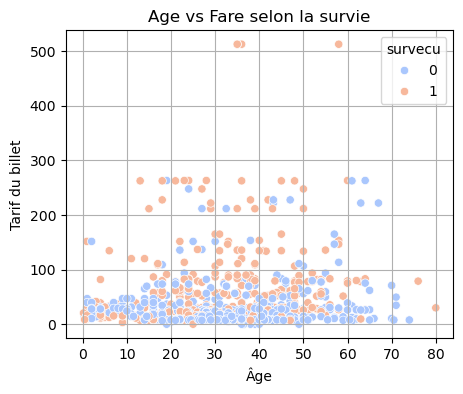

In [114]:
# Scatterplot entre âge et tarif selon la survie
plt.figure(figsize=(5,4))
sns.scatterplot(data=titanic_dt, x='age', y='fare', hue='survecu', palette='coolwarm')
plt.title('Age vs Fare selon la survie')
plt.xlabel('Âge')
plt.ylabel('Tarif du billet')
plt.grid(True)
plt.show()

Ce graphique semble confirmer que le tarif du billet (donc la classe sociale) et l’âge ont un effet sur la probabilité de survie. Les enfants et les passagers de première classe (tarif élevé) ont eu plus de chances de survivre, tandis que la majorité des décès concerne les passagers plus modestes, ayant payé des billets moins chers.

In [115]:
import pandas as pd
#calculer le taux de survie selon l'âge et le tarif
# Supposons que votre DataFrame se nomme df et qu'il contient les colonnes 'Survived', 'Age' et 'Fare'

# Créez des catégories d'âge et de tarif (vous pouvez ajuster les seuils selon vos besoins)
titanic_dt['Age_Group'] = pd.cut(titanic_dt['age'], bins=[0, 15, 30, 45, 60, 75, 90], labels=['0-15', '16-30', '31-45', '46-60', '61-75', '76-90'])
titanic_dt['Fare_Group'] = pd.cut(titanic_dt['fare'], bins=[0, 10, 30, 60, 100, 200, 500], labels=['0-10', '11-30', '31-60', '61-100', '101-200', '201-500'])

# Groupez par les catégories d'âge et de tarif et calculez le pourcentage de survivants
survival_percentage = titanic_dt.groupby(['Age_Group', 'Fare_Group'])['survecu'].value_counts(normalize=True).unstack() * 100

print(survival_percentage)

survecu                        0           1
Age_Group Fare_Group                        
0-15      0-10         22.222222   77.777778
          11-30        40.909091   59.090909
          31-60        58.064516   41.935484
          61-100       66.666667   33.333333
          101-200      20.000000   80.000000
          201-500       0.000000  100.000000
16-30     0-10         78.260870   21.739130
          11-30        61.428571   38.571429
          31-60        45.000000   55.000000
          61-100       34.375000   65.625000
          101-200      41.666667   58.333333
          201-500      25.000000   75.000000
31-45     0-10         77.325581   22.674419
          11-30        60.869565   39.130435
          31-60        46.428571   53.571429
          61-100       51.515152   48.484848
          101-200       5.263158   94.736842
          201-500      30.000000   70.000000
46-60     0-10         90.909091    9.090909
          11-30        65.306122   34.693878
          

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\661091425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt['Age_Group'] = pd.cut(titanic_dt['age'], bins=[0, 15, 30, 45, 60, 75, 90], labels=['0-15', '16-30', '31-45', '46-60', '61-75', '76-90'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\661091425.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dt['Fare_Group'] = pd.cut(titanic_dt['fare'], bins=[0, 10, 30, 60, 100, 200, 500], labels=['0-10', '11-30', '31-60', '61-100', '101-20

C:\Users\DELL\AppData\Local\Temp\ipykernel_10460\1538488847.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = titanic_dt.pivot_table('survecu', index='Age_Group', columns='Fare_Group')


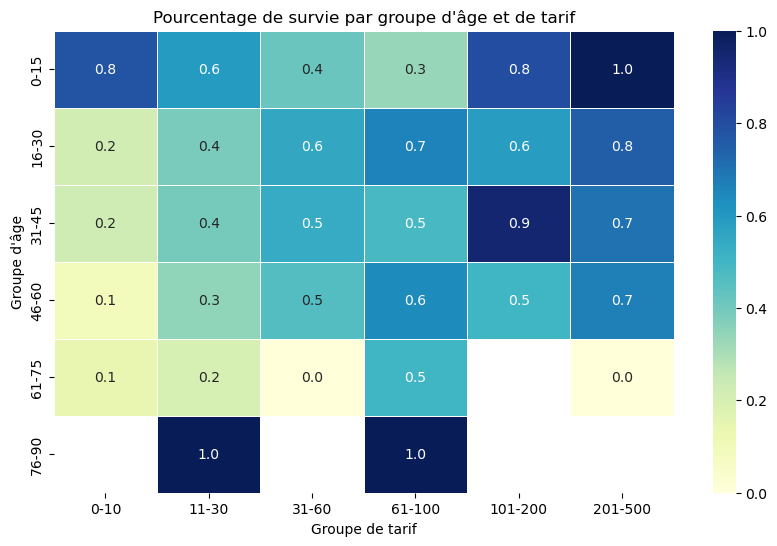

In [116]:
# Calcul du taux de survie par sexe et classe
pivot_table = titanic_dt.pivot_table('survecu', index='Age_Group', columns='Fare_Group')
# Créer la heatmap
plt.figure(figsize=(10, 6)) # Ajustez la taille si nécessaire
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Pourcentage de survie par groupe d\'âge et de tarif')
plt.xlabel('Groupe de tarif')
plt.ylabel('Groupe d\'âge')
plt.show()

 

Ce graphique sous forme de carte thermique (heatmap) présente la répartition des passagers selon leur statut de survie, leur groupe d’âge et leur tarif de billet. Les enfants âgés de 0 à 15 ans présentent un fort taux de survie quel que soit la catégorie des tarifs, ce qui laisse dire qu’ils ont été favorisés lors de l’opération de sauvetage.  
* Chez les jeunes adultes (16 à 30ans), le taux de survie reste relativement modéré (20% à 40%) pour les tarifs les plus bas (0 à 30$), mais s’améliore pour les tarifs élevés.
* Les adultes de 31 à 45ans, montrent une survie globalement moyenne, mais avec une amélioration lorsque le prix des billets augmente, atteignant jusqu’à 90% de survie dans certaines classes tarifaires élevées.
* Pour les adultes d’âge mûre (46 à 60ans), la survie est faible à modérée, et semble-t-elle aussi favorisée les billets couteux. 
* En revanche, chez les personnes âgées (61 à 75 ans), la survie est très faible tarif, dans les tranches d’âge tarifaire payé 61-100$. 
* Fait étonnant, les très âgés (76 à 90 ans) ont un taux de survie de 100 %, quels que soient les tarifs, bien que cela doit être interprété avec prudence (probable faible effectif)
* En résumé, les enfants et les personnes âgés apparaissent comme les groupes d’âges les plus favorisés lors de l’opération de sauvetage, tandis que les adultes, notamment ceux ayant payés des tarifs faibles, présente un taux de survie sensiblement bas.


# Conclusion 
Cette analyse exploratoire a permis d’identifier plusieurs éléments intéressants dont les caractéristiques dominantes dans les groupes de survivants : 
* Les femmes et les enfants ont eu un taux de survie nettement plus élevé. 
* Les passagers de 1ère classe avaient davantage de chances de survivre.
* La plupart des passagers ont embarqué à **Southampton**, mais beaucoup d’entre eux n'ont pas survécu. Par conséquent ce n’est pas là que le taux de survie était plus élevé.
* Le **prix du billet** semble joué également un rôle : les passagers ayant payé des tarifs plus élevés avaient une probabilité de survie plus importante, comme le montre la distribution des tarifs selon la survie.

* Ces résultats montrent que des facteurs comme le genre, l’âge, la classe sociale ou encore le prix du billet ont influencé les chances de survie lors du naufrage du Titanic.

